## Изучение *sklearn.datasets*

In [1]:
from sklearn import datasets
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

plt.style.use(['seaborn', 'seaborn-talk'])

### Генерация выборки

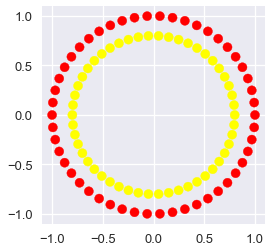

In [2]:
circles = datasets.make_circles()

colors = ListedColormap(['red', 'yellow'])

plt.figure(figsize=(4, 4))
plt.scatter(list(map(lambda x: x[0], circles[0])),
            list(map(lambda x: x[1], circles[0])),
            c=circles[1],
            cmap=colors)

plt.show()

In [3]:
def plot_2d_dataset(data, colors):
    plt.figure(figsize=(4, 4))
    plt.scatter(list(map(lambda x: x[0], data[0])),
            list(map(lambda x: x[1], data[0])),
            c=data[1], cmap=colors)

    plt.show()

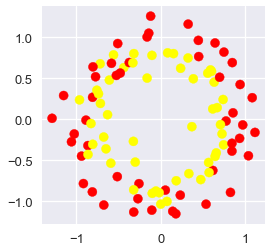

In [4]:
noise_circles = datasets.make_circles(noise=0.15)
plot_2d_dataset(noise_circles, colors)

### Классификация

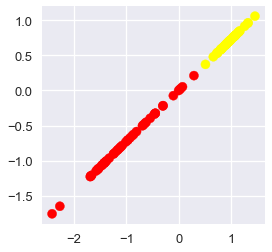

In [5]:
simple_classification_problem = datasets.make_classification(n_features=2, n_informative=1,
                                                             n_redundant=1, n_clusters_per_class=1,
                                                             random_state=1)
plot_2d_dataset(simple_classification_problem, colors)

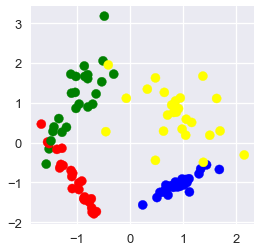

In [6]:
classification_problem = datasets.make_classification(n_features=2, n_informative=2, n_classes=4,
                                                      n_redundant=0, n_clusters_per_class=1, random_state=1)
colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

plot_2d_dataset(classification_problem, colors)

### Игрушечные наборы

In [7]:
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(f'feature names: {iris.feature_names}')
print(f'target  names: {iris.target_names}')

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target  names: ['setosa' 'versicolor' 'virginica']


### Визуализация

In [9]:
from pandas import DataFrame

In [10]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
iris_frame.target = iris_frame.target.apply(lambda x: iris.target_names[x])
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1CC42088>]],
      dtype=object)

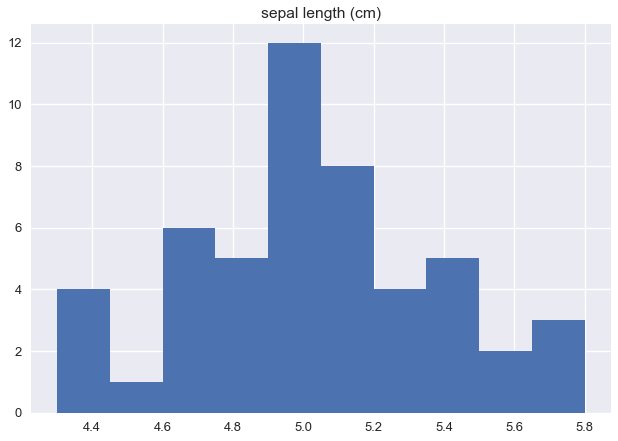

In [12]:
iris_frame[iris_frame.target == 'setosa'].hist('sepal length (cm)')

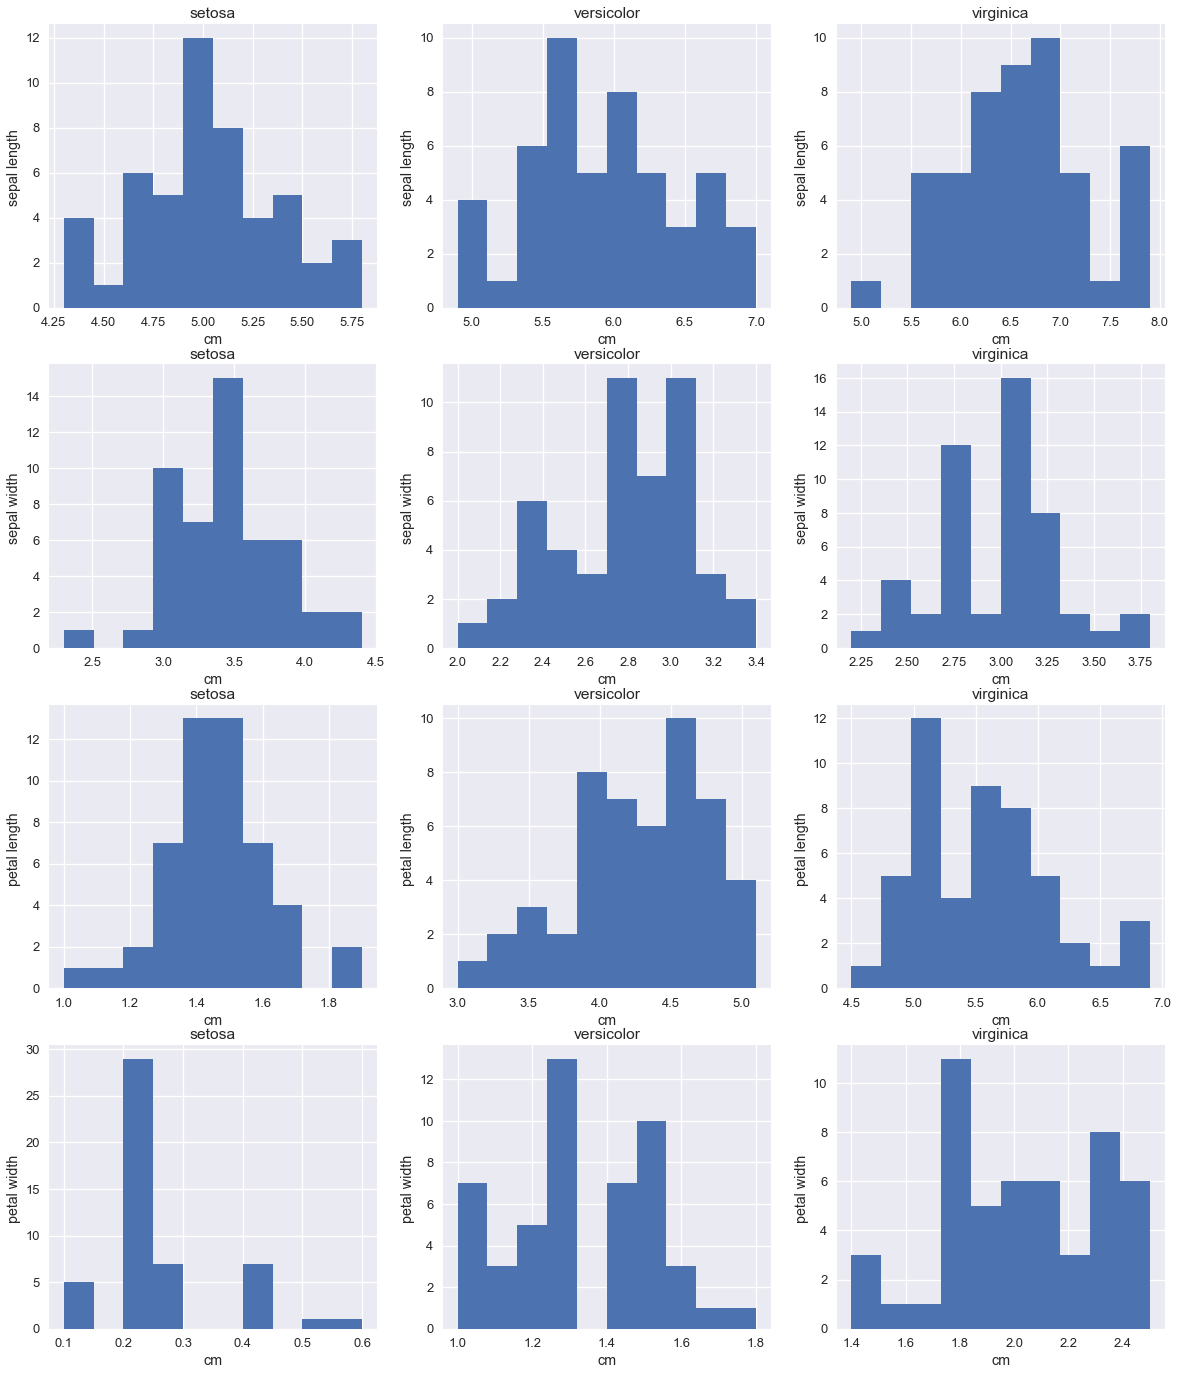

In [20]:
plt.figure(figsize=(20, 24))

plot_number = 0

for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        plt.subplot(4, 3, plot_number)
        plt.hist(iris_frame[iris_frame.target == target_name][feature_name])
        plt.title(target_name)
        plt.xlabel('cm')
        plt.ylabel(feature_name[:-4])

### Seaborn

In [21]:
import seaborn as sns

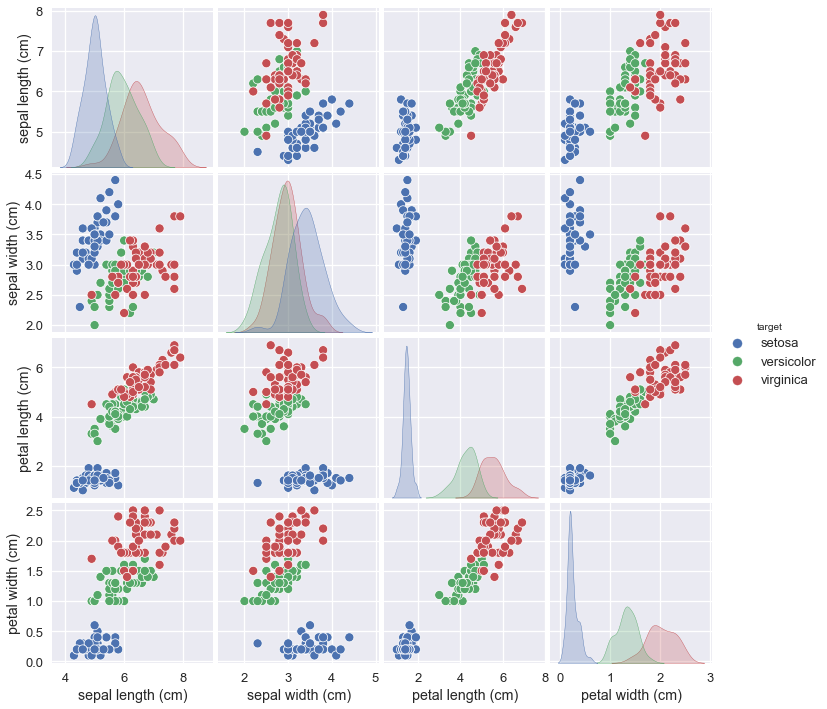

In [30]:
sns.pairplot(iris_frame, hue='target')

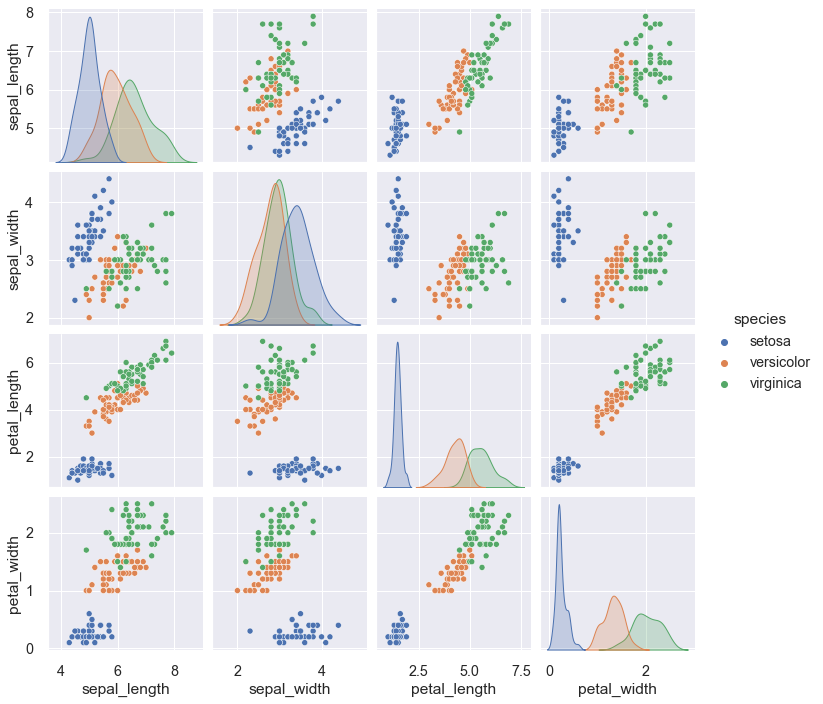

In [33]:
sns.set(font_scale=1.3)
data = sns.load_dataset('iris')

sns.pairplot(data, hue='species')